<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
import numpy as np

def sum_prod(X, V):
    # Считаем сумму произведений матриц и векторов
    result = sum(np.dot(matrix, vector) for matrix, vector in zip(X, V))
    return result

# Тесты
def tests():
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [2]]), np.array([[3], [4]])]
    assert np.all(sum_prod(X, V) == np.array([[44], [64]])), "Test case failed"
    print("All test cases passed!")

tests()


All test cases passed!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
import numpy as np

def binarize(M, threshold=0.5):
    # Преобразуем матрицу на основе порога threshold
    return np.where(M > threshold, 1, 0)

# Тесты
def tests():
    M = np.array([[0.3, 0.4], [0.6, 0.7]])
    assert np.all(binarize(M, 0.5) == np.array([[0, 0], [1, 1]])), "Test case 1 failed"

    M = np.array([[1, 2], [3, 4]])
    assert np.all(binarize(M, 0.5) == np.array([[1, 1], [1, 1]])), "Test case 2 failed"

    M = np.array([[1, 0.1], [0, 2.5]])
    assert np.all(binarize(M, 0.5) == np.array([[1, 0], [0, 1]])), "Test case 3 failed"

    print("All test cases passed!")

tests()


All test cases passed!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def unique_rows(matrix):
    # Уникальные элементы в каждой строке
    return [list(set(row)) for row in matrix]

def unique_columns(matrix):
    # Уникальные элементы в каждом столбце (матрица транспонируется с zip)
    return unique_rows(zip(*matrix))

# Тесты
def tests():
    matrix = [
        [1, 2, 2, 3],
        [4, 5, 1, 1],
        [6, 7, 5, 3]
    ]
    
    expected_rows = [[1, 2, 3], [1, 4, 5], [3, 5, 6, 7]]
    expected_columns = [[1, 4, 6], [2, 5, 7], [1, 2, 5], [1, 3]]

    assert unique_rows(matrix) == expected_rows, "Ошибка в функции unique_rows"
    assert unique_columns(matrix) == expected_columns, "Ошибка в функции unique_columns"

    print("All test cases passed!")

tests()


All test cases passed!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание строк: [-0.06120069  0.10419092  0.29853024 -0.5603785 ]
Дисперсия строк: [1.41794561 1.15970303 0.79366668 0.22717033]
Математическое ожидание столбцов: [ 0.40821931 -0.17237968 -0.23001958 -0.03359917 -0.24579343]
Дисперсия столбцов: [0.87286546 0.18906373 0.4104152  2.6287964  0.60833823]


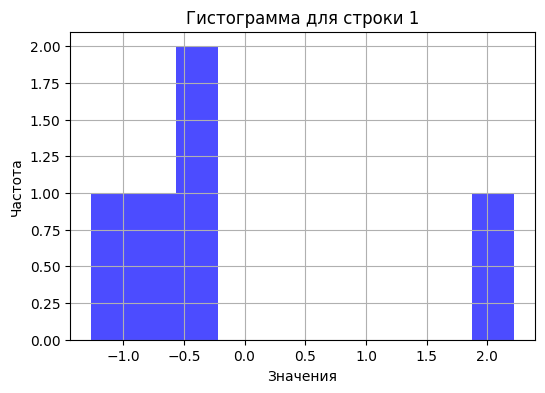

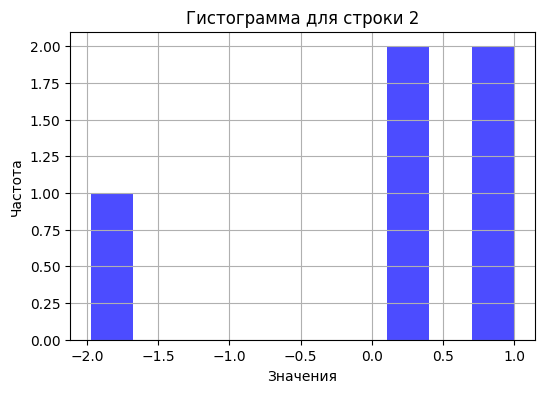

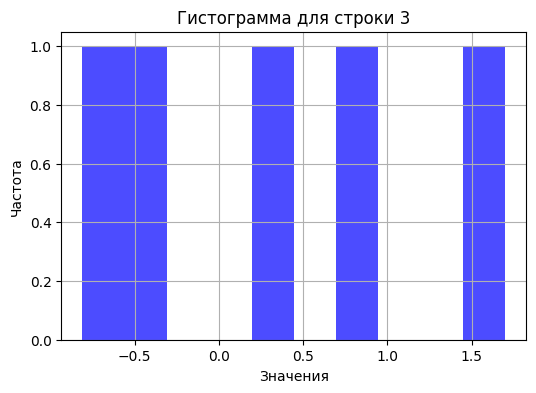

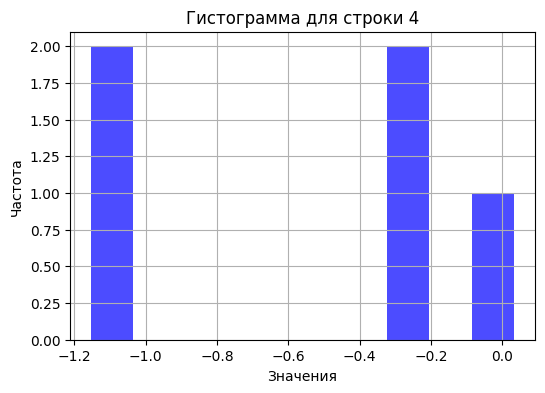

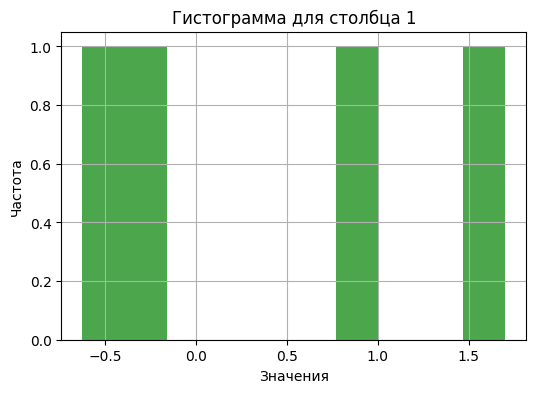

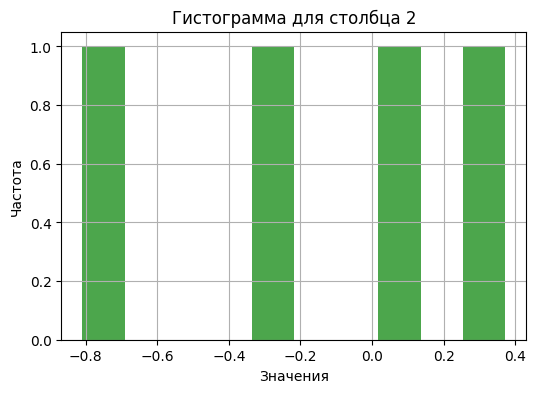

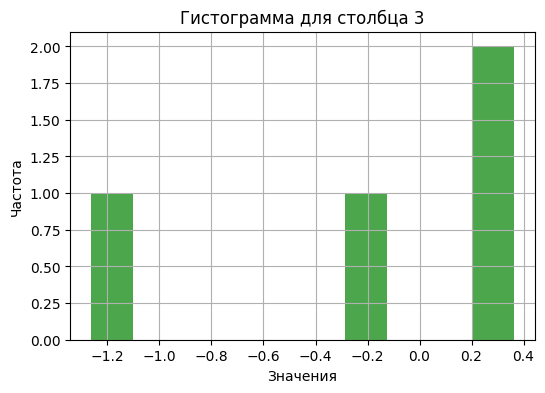

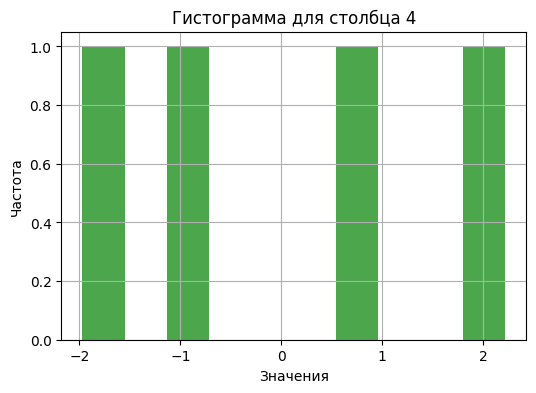

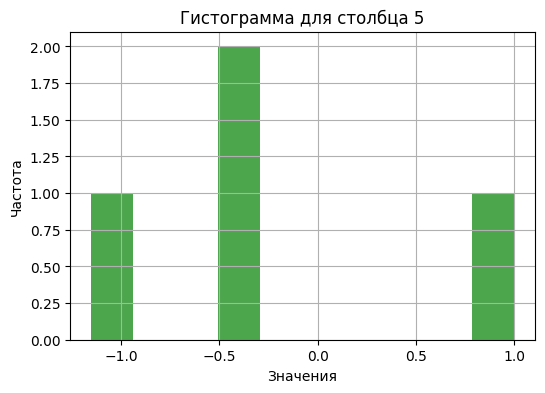

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_matrix(m, n):
    # Создаем матрицу случайных чисел
    matrix = np.random.randn(m, n)
    
    # Вычисляем матожидание и дисперсию для строк и столбцов
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    
    print("Математическое ожидание строк:", row_means)
    print("Дисперсия строк:", row_variances)
    print("Математическое ожидание столбцов:", col_means)
    print("Дисперсия столбцов:", col_variances)
    
    # Гистограммы для строк
    for i in range(m):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[i, :], bins=10, color='blue', alpha=0.7)
        plt.title(f'Гистограмма для строки {i+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    # Гистограммы для столбцов
    for j in range(n):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[:, j], bins=10, color='green', alpha=0.7)
        plt.title(f'Гистограмма для столбца {j+1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

analyze_matrix(4, 5)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [7]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    
    return matrix

def tests():
    result1 = chess(2, 2, 1, 0)
    expected1 = np.array([[1, 0], [0, 1]])  
    assert np.array_equal(result1, expected1), 'Ошибка'

    result2 = chess(3, 3, 1, 0)
    expected2 = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])  
    assert np.array_equal(result2, expected2), 'Ошибка'

    print("All test cases passed!")

tests()

All test cases passed!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [9]:
from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = Image.new("RGB", (n, m), color=background_color)
    draw = ImageDraw.Draw(img)

    left = (n - a) // 2
    top = (m - b) // 2
    right = left + a
    bottom = top + b

    draw.rectangle([left, top, right, bottom], fill=rectangle_color)

    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = Image.new("RGB", (n, m), color=background_color)
    draw = ImageDraw.Draw(img)

    left = (n - a) // 2
    top = (m - b) // 2
    right = left + a
    bottom = top + b

    draw.ellipse([left, top, right, bottom], fill=ellipse_color)

    return img

def test_rectangle():
    img = draw_rectangle(100, 50, 300, 300, rectangle_color=(0, 0, 255), background_color=(255, 255, 255))
    img.save("test_rectangle.png")
    print("Прямоугольник сохранен как test_rectangle.png")

def test_ellipse():
    img = draw_ellipse(100, 150, 300, 300, ellipse_color=(255, 0, 0), background_color=(255, 255, 255))
    img.save("test_ellipse.png")
    print("Овал сохранен как test_ellipse.png")

test_rectangle()
test_ellipse()

Прямоугольник сохранен как test_rectangle.png
Овал сохранен как test_ellipse.png


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
import numpy as np
from scipy.signal import find_peaks

def analyze_time_series(series, p):
    # Математическое ожидание
    mean_value = np.mean(series)
    
    # Дисперсия
    variance_value = np.var(series)
    
    # Среднеквадратическое отклонение (СКО)
    std_deviation = np.std(series)
    
    # Локальные максимумы
    local_maxima_indices = find_peaks(series)[0]
    local_maxima = series[local_maxima_indices]
    
    # Локальные минимумы
    local_minima_indices = find_peaks(-series)[0]
    local_minima = series[local_minima_indices]
    
    # Скользящее среднее с окном размера p
    moving_average = np.convolve(series, np.ones(p) / p, mode='valid')
    
    return {
        'mean': mean_value,
        'variance': variance_value,
        'std_deviation': std_deviation,
        'local_maxima': local_maxima,
        'local_maxima_indices': local_maxima_indices,
        'local_minima': local_minima,
        'local_minima_indices': local_minima_indices,
        'moving_average': moving_average
    }

# Пример использования
time_series = np.array([1, 3, 7, 1, 2, 6, 0, 1, 3, 2, 5, 2, 1, 4])
window_size = 3

result = analyze_time_series(time_series, window_size)

print("Математическое ожидание:", result['mean'])
print("Дисперсия:", result['variance'])
print("Среднеквадратическое отклонение (СКО):", result['std_deviation'])
print("Локальные максимумы:", result['local_maxima'])
print("Индексы локальных максимумов:", result['local_maxima_indices'])
print("Локальные минимумы:", result['local_minima'])
print("Индексы локальных минимумов:", result['local_minima_indices'])
print("Скользящее среднее:", result['moving_average'])


Математическое ожидание: 2.7142857142857144
Дисперсия: 4.061224489795918
Среднеквадратическое отклонение (СКО): 2.015247997095126
Локальные максимумы: [7 6 3 5]
Индексы локальных максимумов: [ 2  5  8 10]
Локальные минимумы: [1 0 2 1]
Индексы локальных минимумов: [ 3  6  9 12]
Скользящее среднее: [3.66666667 3.66666667 3.33333333 3.         2.66666667 2.33333333
 1.33333333 2.         3.33333333 3.         2.66666667 2.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [11]:
import numpy as np

def one_hot_encode(labels):
    # Количество классов равно максимальному значению в labels + 1
    n_classes = np.max(labels) + 1
    
    # Создаем матрицу zeros и заполняем ее
    one_hot = np.zeros((len(labels), n_classes), dtype=int)
    one_hot[np.arange(len(labels)), labels] = 1
    
    return one_hot

# Тесты
def test_one_hot_encode():
    labels = np.array([0, 2, 3, 0])
    result = one_hot_encode(labels)
    expected = np.array([
        [1, 0, 0, 0], 
        [0, 0, 1, 0], 
        [0, 0, 0, 1], 
        [1, 0, 0, 0]
    ])
    assert np.array_equal(result, expected), "Ошибка в one-hot encoding"
    print("All test cases passed!")

test_one_hot_encode()


All test cases passed!
